# AERO 424 Homework 1
By Jonathan Jermstad (8/31/2024)

Importing python libraries (sympy, IPython, matplotlib, numpy, scipy)

In [113]:
import sympy as sy
from sympy.physics.vector import ReferenceFrame,dynamicsymbols
from sympy.physics.vector import Point

import IPython
from IPython.display import display

import matplotlib.pyplot as plt

import numpy as np

import scipy

def displayH: Sympy/Latex hybrid display method allowing for displaying clean symbolic equations.

In [114]:
def displayH(a1,a2='', a3='', a4='', a5='', a6='', a7='',):
    latex_a1 = sy.latex(a1)
    latex_a2 = sy.latex(a2)
    latex_a3 = sy.latex(a3)
    latex_a4 = sy.latex(a4)
    latex_a5 = sy.latex(a5)
    latex_a6 = sy.latex(a6)
    latex_a7 = sy.latex(a7)
    display( IPython.core.display.Math(latex_a1 + latex_a2 + latex_a3 + latex_a4 + latex_a5 + latex_a6 + latex_a7)  )

## 1) Transport Theorem:

Consider a simplified planetary system shown in the figure. The Earth is in a circular orbit of radius R around the Sun, and is orbiting at a constant rate $\dot{\phi}$. The moon is orbiting Earth also in a circular orbit of radius r at a constant rate $\dot{\theta}$. Assume the Sun is inertially fixed with body-frame $N = \left\{\hat{n_{1}}, \hat{n_{2}}, \hat{n_{3}}\right\}$. Let Earth body-fixed frame be $E = \left\{\hat{e_{r}}, \hat{e_{\theta}}, \hat{e_{3}}\right\}$ Let moon body-fixed frame be $M = \left\{\hat{m_{r}}, \hat{m_{\theta}}, \hat{m_{3}}\right\}$. Find the inertial velocity and acceleration of the Moon.

<p align="center">
    <img src="Homework_1_1_Problem.PNG" width="500"/>

Figure 1: The Sun-Earth-Moon system


In [115]:
phi = dynamicsymbols("phi")
theta = dynamicsymbols("theta")
R = sy.Symbol("R")
r = sy.Symbol("r")

t = sy.Symbol("t")

# Define inrtl reference frame (sun)
N = ReferenceFrame('N')
# Coordinates of inrtl reference frame (sun)
O = Point('O')

# Define intermediate reference frame (earth) rotated about N.z by phi
E = N.orientnew('E','Axis',[phi,N.z])

# Define final reference frame (moon) rotated about E.z by theta
M = E.orientnew('M','Axis',[theta,E.z])

displayH("N =",N.x+N.y+N.z)
displayH("E =",E.x+E.y+E.z)
displayH("M =",M.x+M.y+M.z)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Solution:

##### 1. Define position vector of the moon.
$$
\vec{r}_{moon} = R \hat{e}_{r} + r \hat{m}_{r}
$$


In [116]:
# Coordinates of final reference frame (moon) translated byR in E.x and r in M.x
r_moon = O.locatenew("pos_moon",R*E.x+r*M.x)

displayH(sy.Symbol(r"\vec{r}_{moon} ="),r_moon.pos_from(O))

<IPython.core.display.Math object>

##### 2. Define position vector in body frame.
$$
\hat{e}_{r} = cos(\theta) \hat{m}_{r} - sin(\theta) \hat{m}_{\theta}
$$

$$
\vec{r}_{moon} =  \left(R cos(\theta) + r \right)\hat{m}_{r} - R sin(\theta) \hat{m}_{theta}
$$


In [117]:
displayH(sy.Symbol(r"\vec{r}_{moon} ="),r_moon.pos_from(O).express(M))

<IPython.core.display.Math object>

##### 3. Define angular velocity vector ($\vec{\omega}$).
$$
\vec{\omega} = \dot{\phi} \hat{n}_{3}+\dot{\theta} \hat{e}_{3} = (\dot{\\phi}+\dot{\theta}) \hat{m}_{3}
$$


In [118]:
omega = M.ang_vel_in(N)
displayH(sy.Symbol(r"\vec{\omega} ="),omega,"=",omega.express(M))

<IPython.core.display.Math object>

##### 4. Take the inertial derivative (N) of the position vector.
$$
\frac{^{N}d \vec{r}_{moon}}{dt} = \frac{^{M}d \vec{r}_{moon}}{dt} + \vec{\omega}\times\vec{r}_{moon}
$$

$$
\frac{^{M}d \vec{r}_{moon}}{dt} = -R \dot{\theta} sin(\theta) \hat{m}_{r} - R \dot{\theta}cos(\theta) \hat{m}_{\theta}
$$

$$
\vec{\omega}\times\vec{r}_{moon} = (\dot{\theta} + \dot{\phi})\left[R sin(\theta) \hat{m}_{r}+(R cos(\theta) + r)\hat{m}_{\theta}\right]
$$

$$
\frac{^{N}d \vec{r}_{moon}}{dt} = R\dot{\phi}sin(\theta)\hat{m}_{r} + \left(R\dot{\phi}cos(\theta)+(\dot{\phi}+\dot{\theta})r\right)\hat{m}_{\theta}
$$


In [119]:
displayH(sy.Symbol(r"\frac{^{M}d \vec{r}_{moon}}{dt} ="),sy.diff(r_moon.pos_from(O),t,M))
displayH(sy.Symbol(r"\vec{\omega}\times\vec{r}_{moon} ="),omega.cross(r_moon.pos_from(O)).express(M))
v_moon = sy.diff(r_moon.pos_from(O),t,N)
displayH(sy.Symbol(r"\frac{^{N}d \vec{r}_{moon}}{dt} ="),v_moon.express(M).simplify())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

##### 5. Take the inertial derivative (N) of the velocity vector.
$$
\frac{^{N}d \vec{v}_{moon}}{dt} = \frac{^{M}d \vec{v}_{moon}}{dt} + \vec{\omega}\times\vec{v}_{moon}
$$

$$
\frac{^{M}d \vec{v}_{moon}}{dt} = \left[R(\ddot{\phi}sin(\theta)+\dot{\theta}\dot{\phi}cos(\theta))\right]\hat{m}_{r} + \left[R(\ddot{\phi}cos(\theta)-\dot{\theta}\dot{\phi}sin(\theta))+(\ddot{\theta}+\ddot{\phi})r\right]\hat{m}_{\theta}
$$

$$
\vec{\omega}\times\vec{v}_{moon} = (\dot{\phi} + \dot{\theta})\left[-\left(R\dot{\phi}cos(\theta)+(\dot{\phi}+\dot{\theta})r\right)\hat{m}_{r} + R\dot{\phi}sin(\theta)\hat{m}_{\theta}\right]
$$

$$
\frac{^{N}d \vec{v}_{moon}}{dt} = \left[R(\ddot{\phi}sin(\theta)-\dot{\phi}^{2}cos(\theta))-r(2\dot{\theta}\dot{\phi}+\dot{\theta}^{2}+\dot{\phi}^{2})\right]\hat{m}_{r}+\left[R(\dot{\phi}^{2}sin(\theta)+\ddot{\phi}cos(\theta))+r(\ddot{\theta}+\ddot{\phi})\right]\hat{m}_{\theta}
$$


In [120]:
displayH(sy.Symbol(r"\frac{^{M}d \vec{v}_{moon}}{dt} ="),sy.diff(v_moon,t,M).simplify())
displayH(sy.Symbol(r"\vec{\omega}\times\vec{v}_{moon} ="),omega.cross(v_moon).express(M).simplify())
a_moon = sy.diff(v_moon,t,N)
displayH(sy.Symbol(r"\frac{^{N}d \vec{v}_{moon}}{dt} ="),a_moon.express(M).simplify())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## 2. ODEs and Numerical Integration: 

Consider the following differential equation for the Simple Harmonic Motion (SHM):

$$
m\ddot{x} + kx = 0
$$

This second-order differential equation has a closed form analytic solution given by,

$$
x(t) = A sin (\omega t + \phi) \\
$$

Where frequency $\omega = \sqrt{\frac{k}{m}}$, and the constants A and φ are amplitude and phase angle, respectively, and are deter-
mined using initial conditions.

Given:
* m = 1 kg.
* k = 10 N/m.
* Initial conditions: x(t0) = 3 m and x′(t0) = 0 m/s.

Perform the following tasks:

### (a) Find the exact values of x(t) over the time interval t = (0, 0.1, 0.2, . . . 10) secs using the closed form analytic solution. Plot these values.

#### Solution:
##### 1. Find the characteristic equation and roots of the differential equation.
$$
m\ddot{x} + kx => ms^{2}+k=0
$$
$$
s = \sqrt{\frac{-k}{m}} = i\sqrt{\frac{k}{m}}
$$
$$
\omega = imag(s)
$$
##### 2. Write the general solution to the differential equation.
$$
x(t) = A sin(\omega t)+B cos(\omega t)
$$
$$
\dot{x}(t) = A \omega cos(\omega t)-B \omega sin(\omega t)
$$
##### 3. Plug in known quantities to solve for coefficients, knowing that sin(0) = 0 and cos(0) = 1.
$$
x(0) = 3 = \cancel{A sin(\sqrt{10} (0))}+B cos(\sqrt{10} (0)) = B
$$
$$
\dot{x}(0) = 0 = A \sqrt{10} cos(\sqrt{10} t)- \cancel{B \sqrt{10} sin(\sqrt{10} (0))}= A
$$
##### 4. This gives us the final solution to the differential equation.
$$
x(t) = 3cos\left(\sqrt{10}t\right)=3sin\left(\sqrt{10}t+\frac{\pi}{2}\right)
$$


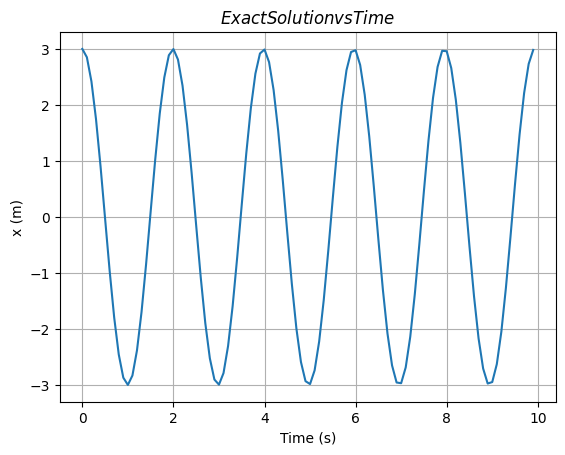

In [121]:
k = 10
m = 1
x0 = [3,0]

A = 0
B = 3
w = (k/m)**.5

def exact_x(t):
    return A*np.sin(w*t)+B*np.cos(w*t)

times = np.arange(0,10,0.1)
plt.figure()
plt.plot(times,exact_x(times))
plt.xlabel("Time (s)")
plt.ylabel("x (m)")
plt.title(r"$Exact Solution vs Time$")
plt.grid()
plt.show()

### (b) For the same time interval, numerically integrate the SHM differential equation using MATLAB’s ”ode45” function. Further, perform the integration with four different relative and absolute error tolerances: <br> 1. tol1 = 10−3 <br> 2. tol2 = 10−6 <br> 3. tol3 = 10−9 <br> 4. tol4 = 10−12 <br> This will provide you with four numerically integrated approximate solutions for x(t).

In [122]:
import scipy.integrate


tolerances = [1e-3,1e-6,1e-9,1e-12]

def dx(x,t):
    return [x[1],-k*x[0]/m]

x_list = []
for tol in tolerances:
    x_list.append(scipy.integrate.odeint(dx,x0,times,rtol=tol,atol=tol)[:,0])

### (c) For each of the four solutions, compute the absolute error between the exact solution and the numerically integrated solutions as follows: <br> $err(t) = |x_{num} − x_{exact}|$ <br> This will result in four sets of error values corresponding to the four numerical solutions.


In [123]:
error_list = [[x[idx]-exact_x(times[idx]) for idx in range(len(x))] for x in x_list]

### (d) Plot the four error curves on the same graph and comment on your observations. Make sure to provide your computer program along with your solution. Hint: Since the errors between the exact and approximate solutions will be small, consider using a logarithmic scale for the y-axis on the error plot for better visualization.

Note: You may use software packages other than MATLAB for this problem, as long
as they support numerical integration with adjustable tolerances.


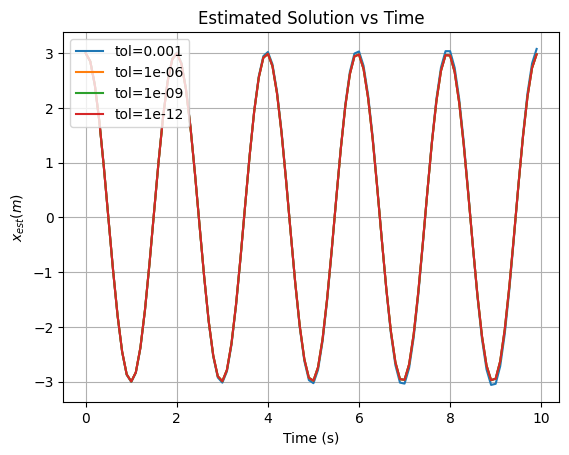

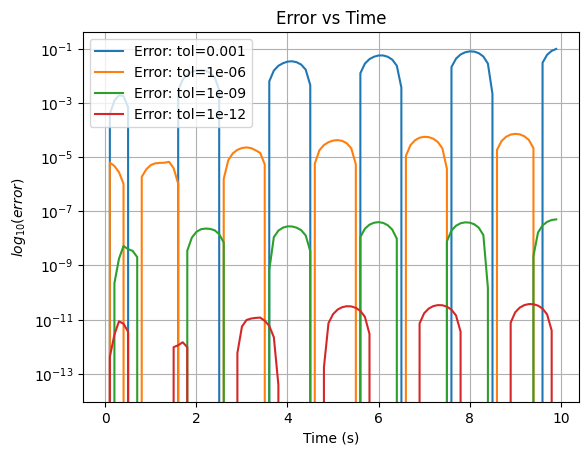

In [124]:
for tol,x in zip(tolerances,x_list):
    plt.plot(times,x,label=f"tol={tol}")
plt.xlabel("Time (s)")
plt.ylabel(r"$x_{est} (m)$")
plt.title("Estimated Solution vs Time")
plt.legend(loc=2)
plt.grid()
plt.show()

plt.figure()
for tol,errors in zip(tolerances,error_list):
    plt.plot(times,errors,label=f"Error: tol={tol}")
plt.xlabel("Time (s)")
plt.ylabel(r"$log_{10}(error)$")
plt.title("Error vs Time")
plt.yscale("log")
plt.legend(loc=2)
plt.grid()
plt.show()

As shown in the plot above, we see that error is sinusoidal and increases by accumulation over time. We can also see that as the tolerance decreases, the magnitude of the error decreases.

From this, we can see that error is a big deal, and must be dealt with, specifically, for a spacecraft one must periodically use sensor data to correct errors in the state vector.

## 3. Attitude Description:

The initial (3-2-1) Euler angles are given as $(\psi_{0}, \theta_{0}, \phi_{0}) = (40\degree, 30\degree, 80\degree)$.

Assume the angular velocity in the body-fixed frame is,
$$
\vec{\omega}(t) =
20\degree^{s^{-1}} \left[\begin{array}{ccc}
sin (0.1t) \\
0.01 \\
cos (0.1t)
\end{array}\right]
$$

Perform the following tasks:


In [125]:
def omega(t):
    return 20/180*np.pi*np.array([np.sin(0.1*t),0.01,np.cos(0.1*t)])

rtol = 1e-12
atol = 1e-12

times = np.linspace(0,60,100)

EA0 = np.radians(np.array([40,0,80]))

psi = EA0[0]
theta = EA0[1]
phi = EA0[2]

### (a) Convert the initial (3-2-1) Euler angles to the corresponding quaternion vector.

#### Solution:

##### 1. Convert Euler angles to the associated 321 Rotation Matrix (T)

$$
T_{321} = \left[\begin{array}{ccc}
c(\theta)c(\psi) && c(\theta)s(\psi) && s(\theta) \\
-c(\phi)s(\psi)+s(\phi)s(\theta)c(\psi) && c(\phi)c(\psi)+s(\phi)s(\theta)s(\psi) && s(\phi)c(\theta) \\
s(\phi)s(\psi)+c(\phi)s(\theta)c(\psi) && -s(\phi)c(\psi)+c(\phi)s(\theta)s(\psi) && c(\phi)c(\theta)
\end{array}\right]
$$


In [126]:
T = np.array([[np.cos(theta)*np.cos(psi),np.cos(theta)*np.sin(psi),-np.sin(theta)],
              [-np.cos(phi)*np.sin(psi)+np.sin(phi)*np.sin(theta)*np.cos(psi),np.cos(phi)*np.cos(psi)+np.sin(phi)*np.sin(theta)*np.sin(psi),np.sin(phi)*np.cos(theta)],
              [np.sin(phi)*np.sin(psi)+np.cos(phi)*np.sin(theta)*np.cos(psi),-np.sin(phi)*np.cos(psi)+np.cos(phi)*np.sin(theta)*np.sin(psi),np.cos(phi)*np.cos(theta)]])

displayH(sy.Symbol(r"T_{321} ="),sy.Matrix(T))

<IPython.core.display.Math object>

##### 2. Find Principal Rotation Vector ($\hat{e}$) and Angle ($\Psi$) 

$$
\Psi = cos^{-1}\left(\frac{trace(T)-1}{2}\right)
$$

$$
\hat{e} = \frac{1}{2sin(\Psi)}\left[\begin{array}{ccc}
T_{1,2}-T_{2,1} \\
T_{2,0}-T_{0,2} \\
T_{0,1}-T_{1,0}
\end{array}\right]
$$


In [127]:
PSI = np.arccos(0.5*(np.trace(T)-1))
e = 0.5/np.sin(PSI)*np.array([T[1,2]-T[2,1],
                              T[2,0]-T[0,2],
                              T[0,1]-T[1,0]])

displayH(sy.Symbol(r"\Psi ="),np.degrees(PSI),sy.Symbol(r"\degree"))
displayH(sy.Symbol(r"\hat{e} ="),sy.Matrix(e))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

##### 3. Find corresponding quaternion

$$
\vec{q} = \left[\begin{array}{cccc}
c(\Psi/2) \\
e_{0}s(\Psi/2) \\
e_{1}s(\Psi/2) \\
e_{2}s(\Psi/2)
\end{array}\right]
$$


In [128]:
Q0 = np.array([np.cos(PSI/2),
               e[0]*np.sin(PSI/2),
               e[1]*np.sin(PSI/2),
               e[2]*np.sin(PSI/2)])

displayH(sy.Symbol(r"\vec{q}_{0} ="),sy.Matrix(Q0))

<IPython.core.display.Math object>

### (b) Write a program to numerically integrate both the (3-2-1) Euler angles and the quaternion vector over a simulation time of 1 minute. Plot the time histories.

#### Solution:

##### 1. Write the KDE for the (321) Euler Angles.

$$
\left[\begin{array}{ccc}
\dot{\psi} \\
\dot{\theta} \\
\dot{\phi}
\end{array}\right] = 

\left[\begin{array}{ccc}
0 && \frac{s(\phi)}{c(\theta)} && \frac{c(\phi)}{c(\theta)} \\
0 && c(\phi) && -s(\phi) \\
1 && s(\phi)t(\theta) && c(\phi)t(\theta)
\end{array}\right]

\left[\begin{array}{ccc}
\omega_{0} \\
\omega_{1} \\
\omega_{2}
\end{array}\right]
$$


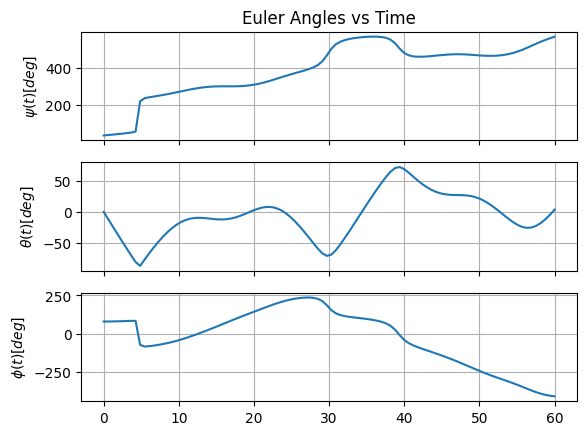

In [129]:
def d_EA(EA,time):
    c = np.cos;s = np.sin;t = np.tan
    psi = EA[0];theta = EA[1];phi = EA[2]
    A = np.array([[0,s(phi)/c(theta),c(phi)/c(theta)],
                  [0,c(phi),-s(phi)],
                  [1,s(phi)*t(theta),c(phi)*t(theta)]])
    return A@omega(time)

EA = scipy.integrate.odeint(d_EA,EA0,times,rtol=rtol,atol=atol)

fig,axes = plt.subplots(3,1,sharex=True)
axes[0].set_title("Euler Angles vs Time")
for idx in range(3):
    axes[idx].plot(times,np.degrees(EA[:,idx]))
    axes[idx].grid()
axes[0].set_ylabel(r'$\psi (t) [deg]$')
axes[1].set_ylabel(r'$\theta (t) [deg]$')
axes[2].set_ylabel(r'$\phi (t) [deg]$')
plt.show()

##### 2. Write the KDE for the Quaternion.

$$
\underline{\dot{q}} = 

\frac{1}{2}\left[\begin{array}{cccc}
q_{0} && -q_{1} && -q_{2} && -q_{3} \\
q_{1} && q_{0} && -q_{3} && q_{2} \\
q_{2} && q_{3} && q_{0} && -q_{1} \\
q_{3} && -q_{2} && q_{1} && q_{0}
\end{array}\right]

\left[\begin{array}{cccc}
0 \\
\omega_{0} \\
\omega_{1} \\
\omega_{2}
\end{array}\right]
$$


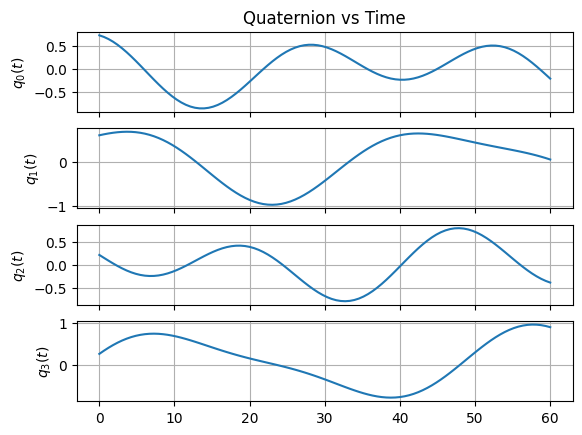

In [130]:
def d_Quat(Q,time):
    A = np.array([[Q[0],-Q[1],-Q[2],-Q[3]],
                  [Q[1],Q[0],-Q[3],Q[2]],
                  [Q[2],Q[3],Q[0],-Q[1]],
                  [Q[3],-Q[2],Q[1],Q[0]]])
    return 0.5*A@np.insert(omega(time),0,0)

Q = scipy.integrate.odeint(d_Quat,Q0,times,rtol=rtol,atol=atol)

fig,axes = plt.subplots(4,1,sharex=True)
axes[0].set_title("Quaternion vs Time")
axes[0].plot(times,[q[0] for q in Q])
axes[0].grid()
for idx in range(1,4):
    axes[idx].plot(times,[q[idx] for q in Q])
    axes[idx].grid()
axes[0].set_ylabel(r'$q_{0} (t)$')
axes[1].set_ylabel(r'$q_{1} (t)$')
axes[2].set_ylabel(r'$q_{2} (t)$')
axes[3].set_ylabel(r'$q_{3} (t)$')
plt.show()

### (c) Additionally, plot the norm of the Quaternion vector at each time. Comment on these values.


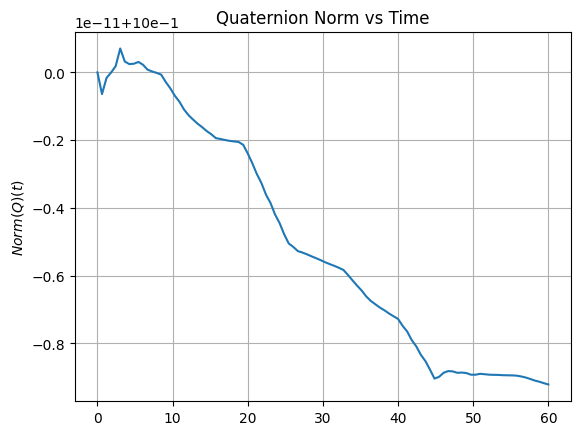

In [131]:
plt.figure()
plt.title("Quaternion Norm vs Time")
plt.plot(times,[np.linalg.norm(q) for q in Q])
plt.grid()
plt.ylabel(r'$Norm(Q) (t)$')
plt.show()

### (d) Convert the quaternion vector at the final simulation time back to the (3-2-1) Euler angles. Compare these values to the final Euler angles obtained from numerically integrating the (3-2-1) Euler angles. Are these values the same?

#### Solution:

##### 1. Convert the final quaternion to a dcm.

$$
T_{123} = \left[\begin{array}{ccc}
1-2(q_{2}^{2}+q_{3}^{2}) && 2(q_{1}q_{2}+q_{0}q_{3}) && 2(q_{1}q_{3}-q_{0}q_{2}) \\
2(q_{1}q_{2}-q_{0}q_{3}) && 1-2(q_{1}^{2}+q_{3}^{2}) && 2(q_{2}q_{3}+q_{0}q_{1}) \\
2(q_{1}q_{3}+q_{0}q_{2}) && 2(q_{2}q_{3}-q_{0}q_{1}) && 1-2(q_{2}^{2}+q_{2}^{2})
\end{array}\right]
$$


In [132]:
w, x, y, z = Q[-1]
xx, xy, xz, xw = x * x, x * y, x * z, x * w
yy, yz, yw = y * y, y * z, y * w
zz, zw = z * z, z * w
T = np.array([
    [1 - 2 * (yy + zz),     2 * (xy + zw),     2 * (xz - yw)],
    [    2 * (xy - zw), 1 - 2 * (xx + zz),     2 * (yz + xw)],
    [    2 * (xz + yw),     2 * (yz - xw), 1 - 2 * (xx + yy)]
    ])
displayH(sy.Symbol(r"T_{321} ="),sy.Matrix(T))

<IPython.core.display.Math object>

##### 2. Convert DCM to Euler Angles.

$$
\left[\begin{array}{ccc}
\psi \\
\theta \\
\phi
\end{array}\right]
=
\left[\begin{array}{ccc}
tan^{-1}\left(\frac{T_{0,1}}{T_{0,0}}\right) \\
-sin^{-1}(T_{0,2}) \\
tan^{-1}\left(\frac{T_{1,2}}{T_{2,2}}\right)
\end{array}\right]
$$


In [133]:
EAf = np.array([np.arctan2(T[0,1],T[0,0]),-np.arcsin(T[0,2]),np.arctan2(T[1,2],T[2,2])])

displayH(sy.Symbol(r"\left[\begin{array}{ccc}\psi_{q} \\ \theta_{q} \\ \phi_{q} \end{array}\right] ="),sy.Matrix(EAf),sy.Symbol(r"\xrightarrow{wrap (2 \pi)}"),sy.Matrix(EAf%(2*np.pi)))
displayH(sy.Symbol(r"\left[\begin{array}{ccc}\psi_{EA} \\ \theta_{EA} \\ \phi_{EA} \end{array}\right] ="),sy.Matrix(EA[-1]),sy.Symbol(r"\xrightarrow{wrap (2 \pi)}"),sy.Matrix(EA[-1]%(2*np.pi)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Comparing the difference in the euler angles, we see that they represent the same orientation.